In [135]:
import sys
sys.path.insert(0,'C:\\Coding\\Local_repositories\\Exammmmm\\')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import optimize

import seaborn as sns
sns.set_theme()

# pd.set_option('display.float_format', '{:.4f}'.format) # 4 decimals are shown in pandas dataframes

from OwnCodeLib import four_deci
from codelib.visualization.base import fan_chart

# Optimizing portfolios

In [136]:
# Load data

asset = {}

for i in range(1, 11):
    asset[i] = pd.read_csv("C:\\Coding\\Local_repositories\\Exammmmm\\ExamData\\asset_{}.csv".format(i), index_col = 0).transpose()

In [137]:
# Linear and cumulative returns and log returns

lin_ret = {}
cum_lin_ret = {}
log_ret = {}
cum_log_ret = {}

for i in asset:
    lin_ret[i] = asset[i][:] / asset[i][:].shift(1) - 1
    cum_lin_ret[i] = (lin_ret[i] + 1).cumprod() - 1
    log_ret[i] = np.log(asset[i][:] / asset[i][:].shift(1))
    cum_log_ret[i] = log_ret[i].cumsum()

In [138]:
# Descriptive stats 1 year horizon

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "95th percentile"]
oneypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
oneyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    oneypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    oneypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    oneypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    oneypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    oneypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    oneypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    oneyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    oneyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    oneyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    oneyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    oneyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    oneyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(oneypricedescr.to_latex())
print(oneyretdescr.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &     Mean & Standard deviation &   Skewness &  Kurtosis & 5th percentile & 95th percentile \\
\midrule
1  &   1.0928 &           0.189981 &   0.160498 &  0.285135 &       0.784331 &         1.41215 \\
2  &  1.09552 &           0.192603 &   0.185659 &  0.265471 &       0.787527 &         1.42115 \\
3  &  1.09191 &           0.191742 &   0.197202 &   0.23909 &       0.782972 &         1.40982 \\
4  &  1.08513 &            0.18128 &   0.158357 &  0.394116 &        0.78924 &         1.38911 \\
5  &  1.07021 &           0.153326 &  0.0408714 &  0.344938 &       0.814935 &         1.32181 \\
6  &   1.0632 &           0.140139 & -0.0753114 &  0.338187 &       0.827722 &         1.29009 \\
7  &  1.06184 &           0.140387 &  -0.066703 &  0.308762 &       0.823161 &         1.28449 \\
8  &  1.05658 &           0.127525 &  -0.133624 &  0.365465 &       0.839421 &         1.25983 \\
9  &  1.05607 &           0.128044 &  -0.129932 &  0.383646 &       0.83905

In [139]:
# Descriptive stats 5 year horizon

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "95th percentile"]
fiveypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
fiveyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    fiveypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    fiveypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    fiveypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    fiveypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    fiveypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    fiveypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    fiveyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    fiveyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    fiveyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    fiveyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    fiveyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    fiveyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(fiveypricedescr.to_latex())
print(fiveyretdescr.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &     Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile & 95th percentile \\
\midrule
1  &  1.54434 &           0.630468 &   1.05292 &   1.88073 &       0.711896 &            2.71 \\
2  &  1.54431 &           0.629056 &   1.10693 &   2.42783 &       0.711857 &         2.70966 \\
3  &  1.53591 &           0.618368 &   1.09461 &   2.25201 &       0.726861 &         2.69627 \\
4  &    1.489 &           0.569249 &  0.991692 &   1.81062 &       0.717818 &         2.54939 \\
5  &  1.39021 &           0.455167 &  0.809633 &   1.42071 &       0.750819 &         2.21741 \\
6  &  1.34879 &           0.410607 &  0.742998 &   1.12134 &       0.759814 &         2.07698 \\
7  &  1.34245 &           0.406595 &  0.743284 &   1.24554 &       0.761049 &         2.06931 \\
8  &  1.30735 &           0.364608 &   0.55645 &  0.515262 &       0.771279 &         1.96757 \\
9  &  1.30387 &           0.360752 &  0.589246 &  0.719585 &       0.769784 &       

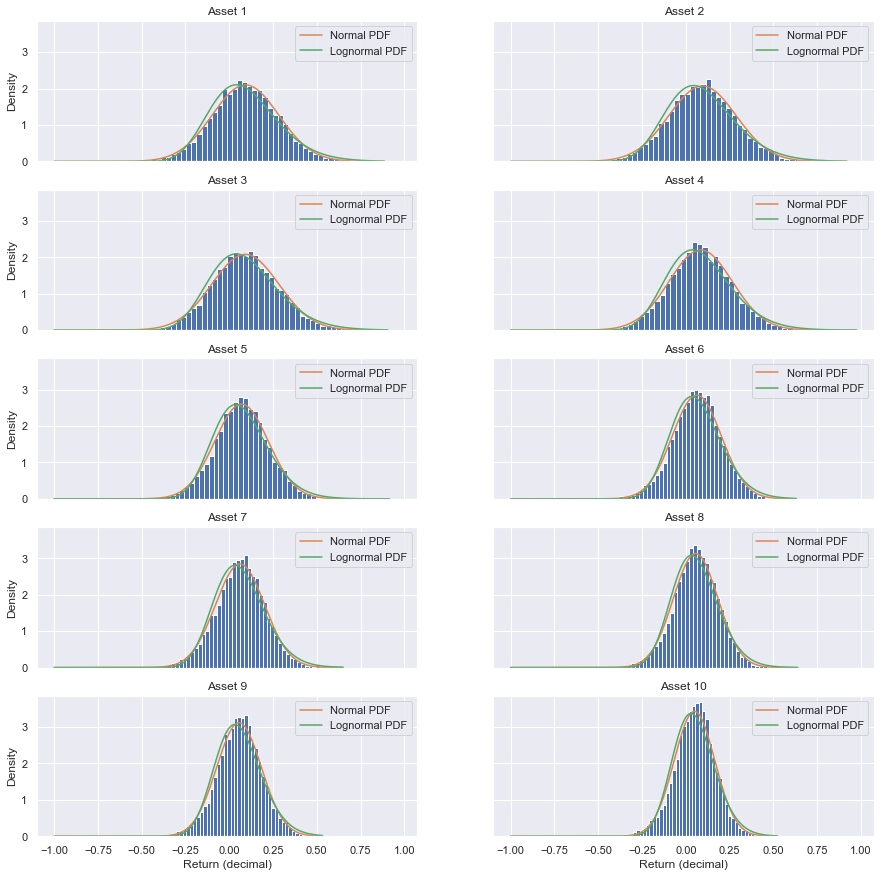

In [140]:
# 1 year return distributions

horizon = 1
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.show()

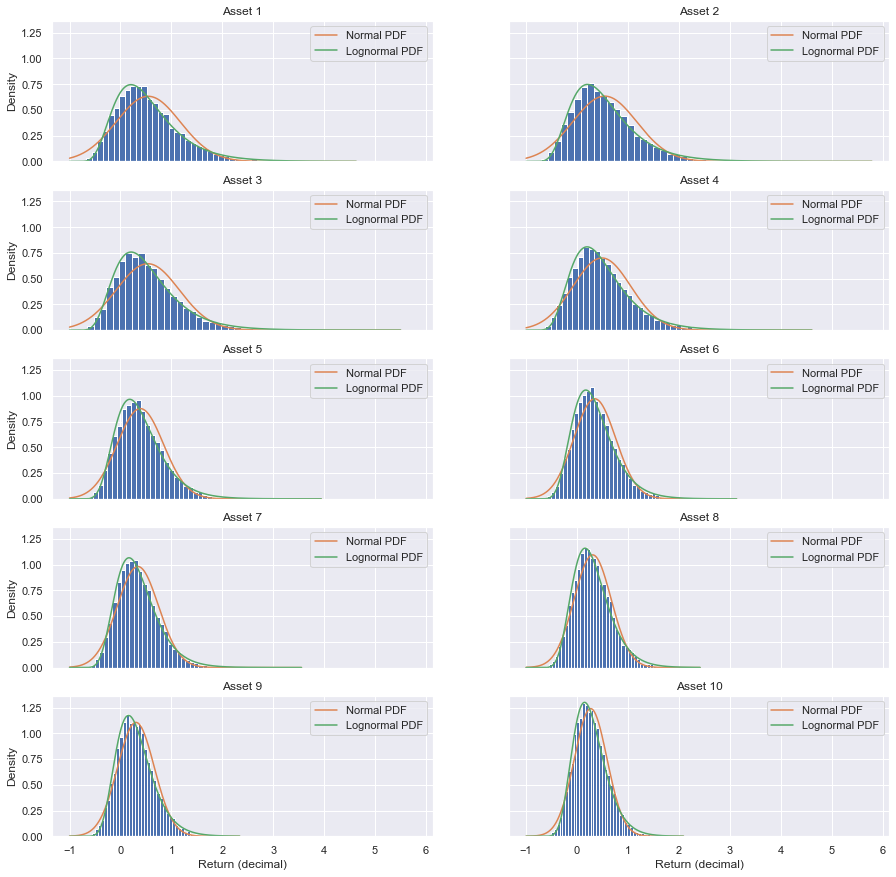

In [141]:
# 5 year return distributions

horizon = 5
lims = [-0.75, 0.75]
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.show()

In [142]:
# Equally weighted

pf_ew_ret = (lin_ret[1] + lin_ret[2] + lin_ret[3] + lin_ret[4] + lin_ret[5] + lin_ret[6] + lin_ret[7] + lin_ret[8] + lin_ret[9] + lin_ret[10]) / len(lin_ret)
pf_ew_price = ((pf_ew_ret + 1).cumprod() - 1).fillna(0) + 1
pf_ew_price_np = pf_ew_price.to_numpy()

# Buy and hold

pf_bh_price = (asset[1] + asset[2] + asset[3] + asset[4] + asset[5] + asset[6] + asset[7] + asset[8] + asset[9] + asset[10]) / len(asset)
pf_bh_price_np = pf_bh_price.to_numpy()

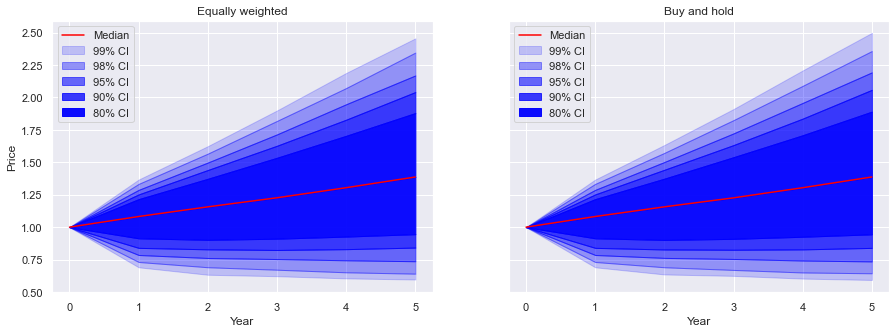

In [143]:
# Plot of prices

x = np.linspace(0, 5, 6)

percentiles_pf_ew_price_np = np.percentile(pf_ew_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharex = True, sharey = True)

fan_chart(x,
          percentiles_pf_ew_price_np,
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax = ax[0])

ax[0].set_xlabel("Year")
ax[0].set_ylabel("Price")
ax[0].set_title("Equally weighted")

ax[0].legend(loc='upper left');

percentiles_pf_bh_price_np = np.percentile(pf_bh_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fan_chart(x,
          percentiles_pf_bh_price_np,
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax = ax[1])

ax[1].set_xlabel("Year")

ax[1].set_title("Buy and hold")

ax[1].legend(loc='upper left');

In [144]:
# Equally weighted returns and cumulative returns

pf_ew_ret = pf_ew_price / pf_ew_price.shift(1) - 1
pf_ew_cum_ret = (1 + pf_ew_ret).cumprod() - 1

# Buy and hold returns and cumulative returns

pf_bh_ret = pf_bh_price / pf_bh_price.shift(1) - 1
pf_bh_cum_ret = (1 + pf_bh_ret).cumprod() - 1

In [145]:
# 1 year portfolio returns descriptive statistics for both EW and BH

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
oneypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

oneypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

oneypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [146]:
oneypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.0723142,0.122671,-0.530503,0.808981,-0.159746,-0.229001
BH,0.0723142,0.122671,-0.530503,0.808981,-0.159746,-0.229001


In [147]:
# 5 year portfolio returns descriptive statistics for both EW and BH

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
fiveypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

fiveypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

fiveypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [148]:
fiveypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.404248,0.367125,0.382258,0.409362,-0.157566,-0.27926
BH,0.407453,0.372615,0.41841,0.46775,-0.159927,-0.279982


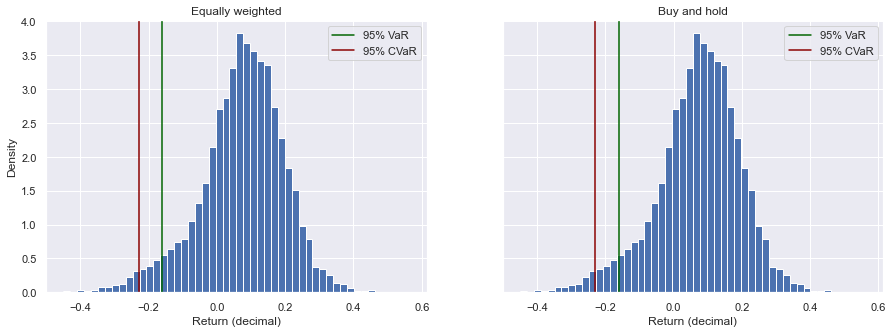

In [149]:
# 1 year portfolio returns distributions for both EW and BH

horizon = 1
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(oneypfdescr["95% VaR"].loc["EW"], label = "95% VaR", color = "darkgreen")
ax[0].axvline(oneypfdescr["95% CVaR"].loc["EW"], label = "95% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(oneypfdescr["95% VaR"].loc["BH"], label = "95% VaR", color = "darkgreen")
ax[1].axvline(oneypfdescr["95% CVaR"].loc["BH"], label = "95% CVaR", color = "darkred")
ax[1].set_title("Buy and hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

plt.show()

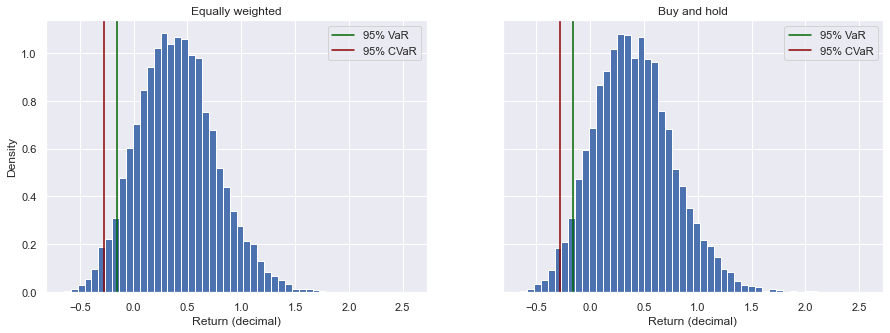

In [150]:
# 5 year portfolio returns distributions for both EW and BH

horizon = 5
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(fiveypfdescr["95% VaR"].loc["EW"], label = "95% VaR", color = "darkgreen")
ax[0].axvline(fiveypfdescr["95% CVaR"].loc["EW"], label = "95% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(fiveypfdescr["95% VaR"].loc["BH"], label = "95% VaR", color = "darkgreen")
ax[1].axvline(fiveypfdescr["95% CVaR"].loc["BH"], label = "95% CVaR", color = "darkred")
ax[1].set_title("Buy and hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

plt.show()

In [151]:
# We convert the dictionary into a 3D numpy array

cum_lin_ret_np = np.array(list(cum_lin_ret.values())).T

## Optimal portfolio weights (buy and hold) 

In [152]:
# Minimization of standard deviation

# Objective function

def OptPFWeightsMinStd(w: np.array, horizon: int, cum_lin_ret_np: np.array):
    """Finds standard deviation of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return pf_return[horizon, :].std(ddof=1)

# Minimization of CVaR

# Objective function

def OptPFWeightsMinCVaR(w: np.array, horizon: int, cum_lin_ret_np: np.array, alpha: int = 95):
    """Finds CVaR of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return abs(np.mean(pf_return[horizon, :][pf_return[horizon, :] <= np.percentile(pf_return[horizon, :], (100 - alpha))]))

### 1 year horizon

In [153]:
# Constraints

target = 0.08

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [154]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwstdoney.x.round(4)

array([0.1145, 0.186 , 0.1068, 0.1779, 0.1637, 0.0633, 0.1067, 0.0183,
       0.0628, 0.    ])

In [155]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwcvaroney.x.round(4)

array([0.    , 0.2435, 0.1194, 0.2472, 0.1866, 0.    , 0.0376, 0.0169,
       0.1489, 0.    ])

### 5 year horizon

In [156]:
# Constraints

target = 0.45

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [157]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwstdfivey.x.round(4)

array([0.0832, 0.14  , 0.1405, 0.1922, 0.1922, 0.0599, 0.1293, 0.    ,
       0.0627, 0.    ])

In [158]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwcvarfivey.x.round(4)

array([0.    , 0.1267, 0.2317, 0.223 , 0.1904, 0.0124, 0.1125, 0.    ,
       0.0828, 0.0205])

# Plotting the optimal portfolio weights

### 1 year horizon

In [159]:
# One year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.05, 0.09, 21)
opt_weight_std_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdoney.x.round(4)
    
    opt_weight_std_one_year.append(optwstdoney.x)

In [160]:
# One year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.05, 0.09, 21)
opt_weight_CVaR_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvaroney.x.round(4)
    
    opt_weight_CVaR_one_year.append(optwcvaroney.x)

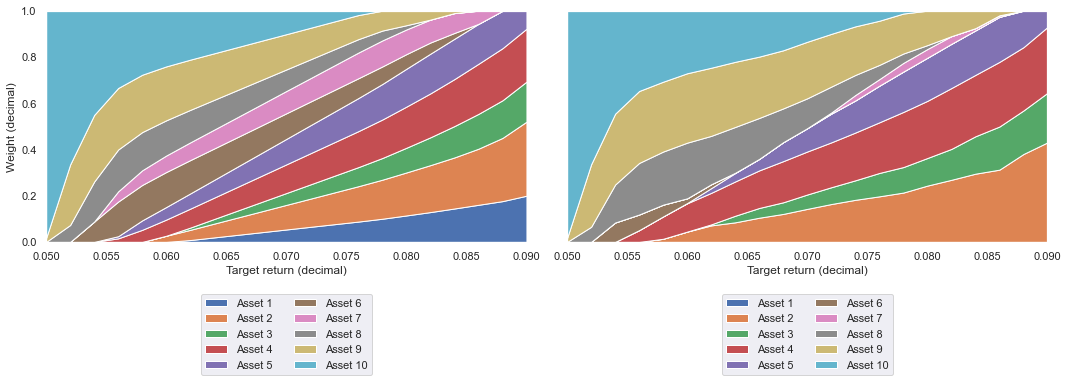

In [161]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_one_year).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

ax[1].stackplot(targets, np.array(opt_weight_CVaR_one_year).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()

### 5 year horizon

In [162]:
# Five year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.3, 0.5, 41)
opt_weight_std_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdfivey.x.round(4)
    
    opt_weight_std_five_years.append(optwstdfivey.x)

In [163]:
# Five year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.3, 0.5, 41)
opt_weight_CVaR_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvarfivey.x.round(4)
    
    opt_weight_CVaR_five_years.append(optwcvarfivey.x)

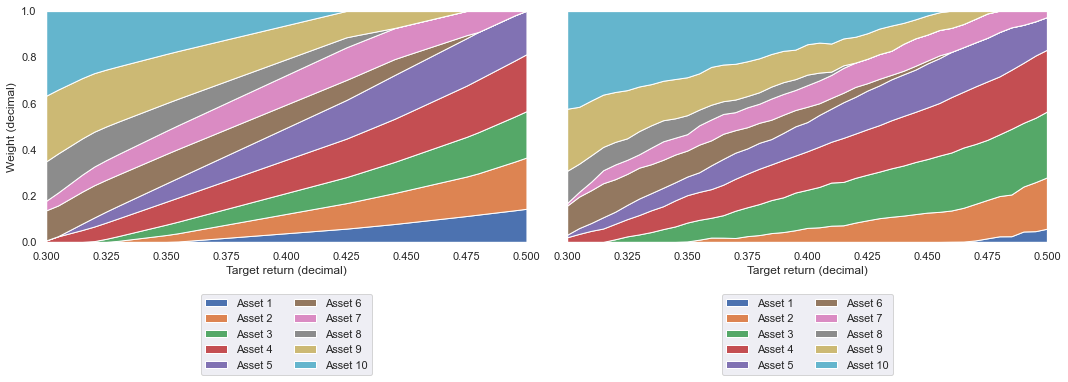

In [164]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_five_years).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

ax[1].stackplot(targets, np.array(opt_weight_CVaR_five_years).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()

# Views according to Meucci - Fully Flexible Views: Theory and Practice

In [165]:
# Idea: We wish to maximize the Lagrangian dual function w.r.t. the Lagrangian multiplier, v.
# Once v is estimated, we can use it to calculate p_thilde - the new probabilities that make sure our view is satisfied by 
# ultimately changing the prior distribution so that we obtain a posterior distribution, which 1) satisfies our view while 2)
# also being as similar to the prior distribution as possible
# The optimization problem here stems from the fact that we wish to minimize the relative entropy, i.e., the difference between
# the prior and posterior distributions
# When p tilde changes, it corresponds to a change in the FREQUENCY of a given return/price - not the size of the actual 
# return/price

# Function to calculate the new probabilities

def calculate_p_tilde(v, p, H_matrix):
    
    temp = np.log(p) - 1.0 - np.transpose(H_matrix) @ v
    
    return np.exp(temp)

# Lagrangian dual function that we wish to optimize w.r.t. v (Lagrangian multiplier)
# This is a Lagrandian *dual* function, because we let x be a function of the Lagrangian multiplier, v, in the sense that
# x is defined in terms of the function 'calculate_p_tilde', which is a function of v

def lagrangian_dual_function(v, p, H_matrix, h_vector):
    
    x = calculate_p_tilde(v, p, H_matrix)
    x = np.maximum(x, 10 ** (-32))
    
    lagrangian = x.T @ (np.log(x) - np.log(p)) + v @ (H_matrix @ x - h_vector)
    
    return -lagrangian

### 1 year horizon: Asset 1 (5% to 0.85), asset 2 (50% to 1.13), asset 6 (5% to 0.9), asset 10 (5% to 0.9)

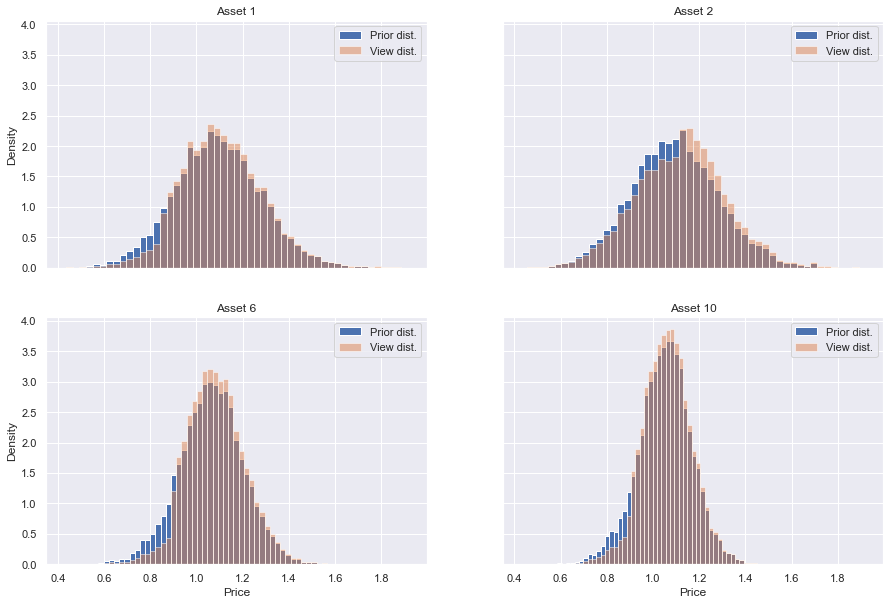

In [166]:
# H matrix specifies the linear equality constraints
# We add the constraint that the weights need to sum to one 

horizon = 1 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [1, 2, 6, 10] # Which asset we apply a view on
which_quantile = [0.05, 0.5, 0.05, 0.05] # The quantile of interest
target_for_quantile = [0.85, 1.13, 0.9, 0.9] # The target value we set for the quantile

p_tilde_oney = dict()

order_one = [0, 0, 1, 1]
order_two = [0, 1, 0, 1]

fig, ax = plt.subplots(2, 2, figsize = (15,10), sharex = True, sharey = True)

for i, j, k, l, m in zip(which_asset, which_quantile, target_for_quantile, order_one, order_two):
    
    bool_vector = np.array((asset[i].iloc[horizon, :] < k) * 1) # Vector of 1's and 0's
    H_matrix = np.vstack((np.ones(num_sim), bool_vector)) # Linear equality constraints
    h_vector = np.array([1.0, j]) # Weights add to 1, view on the quantile of interest

    # Maximize Lagrangian dual 
    # x0 are the start values for the Lagrangian multipliers in vector v

    res = optimize.minimize(fun = lagrangian_dual_function, x0 = [0.0, 0.0], args = (init_probs, H_matrix, h_vector))

    # Calculate p tilde, i.e., the probabilities that makes the posterior distribution satisfy our view(s) while preserving as much
    # of the structure of the prior distribution

    p_tilde_oney[i] = calculate_p_tilde(res.x, init_probs, H_matrix)
    
    # Plotting asset distributions
    
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, density = True, label = "Prior dist.")
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, weights = p_tilde_oney[i], density = True, alpha = 0.5, label = "View dist.")

    ax[l, m].set_title("Asset {}".format(i))
    ax[l, m].legend()

ax[1, 0].set_xlabel('Price')    
ax[1, 1].set_xlabel('Price')        
ax[0, 0].set_ylabel('Density')    
ax[1, 0].set_ylabel('Density') 

plt.show()    

### 5 year horizon: Asset 2 (95% to 2.2), asset 3 (95% to 2.2), asset 8 (5% to 1), asset 10 (5% to 1)

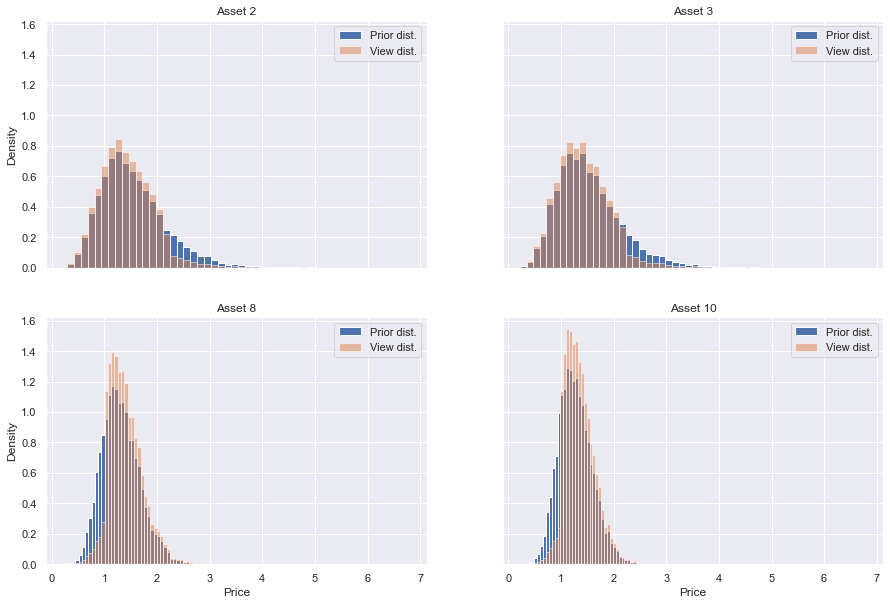

In [167]:
# H matrix specifies the linear equality constraints
# We add the constraint that the weights need to sum to one 

horizon = 5 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [2, 3, 8, 10] # Which asset we apply a view on
which_quantile = [0.95, 0.95, 0.05, 0.05] # The quantile of interest
target_for_quantile = [2.2, 2.2, 1, 1] # The target value we set for the quantile

p_tilde_fivey = dict()

order_one = [0, 0, 1, 1]
order_two = [0, 1, 0, 1]

fig, ax = plt.subplots(2, 2, figsize = (15,10), sharex = True, sharey = True)

for i, j, k, l, m in zip(which_asset, which_quantile, target_for_quantile, order_one, order_two):
    
    bool_vector = np.array((asset[i].iloc[horizon, :] < k) * 1) # Vector of 1's and 0's
    H_matrix = np.vstack((np.ones(num_sim), bool_vector)) # Linear equality constraints
    h_vector = np.array([1.0, j]) # Weights add to 1, view on the quantile of interest

    # Maximize Lagrangian dual 
    # x0 are the start values for the Lagrangian multipliers in vector v

    res = optimize.minimize(fun = lagrangian_dual_function, x0 = [0.0, 0.0], args = (init_probs, H_matrix, h_vector))

    # Calculate p tilde, i.e., the probabilities that makes the posterior distribution satisfy our view(s) while preserving as much
    # of the structure of the prior distribution

    p_tilde_fivey[i] = calculate_p_tilde(res.x, init_probs, H_matrix)
    
    # Plotting asset distributions
    
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, density = True, label = "Prior dist.")
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, weights = p_tilde_fivey[i], density = True, alpha = 0.5, label = "View dist.")

    ax[l, m].set_title("Asset {}".format(i))
    ax[l, m].legend()

ax[1, 0].set_xlabel('Price')    
ax[1, 1].set_xlabel('Price')        
ax[0, 0].set_ylabel('Density')    
ax[1, 0].set_ylabel('Density') 

plt.show()    

### Portfolio optimization with views

In [168]:
view_asset_prices_np = np.array(list(asset.values())).T

In [169]:
asset_prices_np.T.shape

(10, 6, 10000)

In [170]:
asset_prices_np.shape

(10000, 6, 10)

In [171]:
asset_prices_np[:, 1, 0]

array([0.97565587, 0.9314487 , 0.877482  , ..., 0.85688606, 0.9441132 ,
       1.29587398])

In [172]:
asset[1]

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.975656,0.931449,0.877482,0.926806,1.213905,1.097714,0.828383,0.902401,0.902620,1.685787,...,0.913100,1.335196,1.271668,1.351969,0.956311,1.004277,1.121388,0.856886,0.944113,1.295874
2,1.074325,1.016307,0.803039,1.020267,1.106611,1.159052,0.680382,0.842881,1.039578,1.826140,...,1.050607,1.246674,1.505593,1.357183,1.205369,0.878524,1.169284,0.905994,0.958190,1.313848
3,1.225908,1.100991,1.373275,1.229645,1.244074,1.376207,0.738422,0.835515,1.317180,1.467051,...,1.355707,0.825910,1.659963,1.405442,1.493027,0.879207,1.290374,1.270719,1.188419,0.683228
4,1.276205,1.249622,1.560799,1.716342,1.945590,1.754682,0.620006,0.940500,1.358325,1.688295,...,1.813905,1.061704,1.825753,1.435322,1.883153,0.754197,1.207033,1.350889,1.243618,0.794963
5,2.036425,1.356230,2.019056,1.926052,2.057221,1.020100,0.589199,1.008919,1.380390,2.372602,...,1.982767,1.203969,2.243051,1.279624,1.631666,0.806940,1.612141,1.231192,1.293484,0.763365


In [173]:
for i in range(1, 11):
    if i == [2, 3, 8, 10]:
        p_tilde_oney[i]

In [176]:
np.percentile(asset[2].iloc[1, :] * p_tilde_oney[2] * 10000, 50)

0.9382790681077409

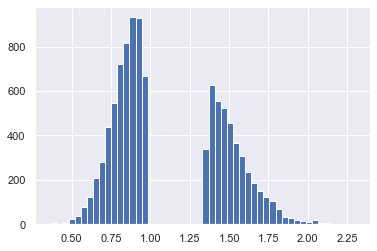

In [184]:
plt.hist((asset[2].iloc[1, :] * p_tilde_oney[2] * 10000), bins = 50)
plt.show()

In [189]:
p_tilde_oney[2].shape

(10000,)

In [188]:
np.bincount(p_tilde_oney[2])

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'